In this notebook, an Exploratory Data Analysis (EDA) will be done on the data that was collected and cleaned. The dataset contains a few details about covid 19 in the United States. The data is in CSV format.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA

Below, the data is being imported into the notebook:

In [120]:
USdf = pd.read_csv('../../Unit7CapstoneWrangling/Covid_Clean_Dataset')

In [121]:
USdf.head()

,Unnamed: 0,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,reproduction_rate,icu_patients,icu_patients_per_million,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,stringency_index
0,0,2020/01/22,1.0,0.0,0.0,0.003,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020/01/23,1.0,0.0,0.0,0.003,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2020/01/24,2.0,1.0,0.0,0.006,0.003,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020/01/25,2.0,0.0,0.0,0.006,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020/01/26,5.0,3.0,0.0,0.015,0.009,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A quick data cleaning task that may have been missed in the cleaning step :). Just to quickly get rid of the unnamed column:

In [122]:
USdf.drop('Unnamed: 0', axis=1, inplace=True)

In [123]:
USdf.head()

,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,stringency_index
0,2020/01/22,1.0,0.0,0.0,0.003,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020/01/23,1.0,0.0,0.0,0.003,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020/01/24,2.0,1.0,0.0,0.006,0.003,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020/01/25,2.0,0.0,0.0,0.006,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020/01/26,5.0,3.0,0.0,0.015,0.009,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Right, so this is our dataframe. As you can see, it has 32 features. There is a lot of analysis to be done before we can consider feeding this data into a model that could possibly predict death rate. The data is based on the date field and we might want to consider making it the index of the dataframe. One could say the data has taken the form of a time series. 

Before we go too far, lets take a quick look at the size and statistics of the dataset.

In [124]:
USdf.shape

(815, 30)

In [125]:
USdf.describe()

,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,stringency_index
count,8.150000e+02,8.150000e+02,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,...,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,815.000000,815.000000,815.000000,815.000000,815.000000
mean,2.807672e+07,9.891126e+04,1212.954601,84335.980707,297.106595,1.038712,10888.069939,32.705249,44482.269939,133.614467,...,2.015735e+08,1.033268e+08,8.616552e+07,1.623882e+07,6.966708e+05,60.713301,31.121718,25.952847,4.817755,58.416982
std,2.426983e+07,1.445251e+05,986.521841,72900.971153,434.119954,0.503523,8700.251066,26.133550,39061.579892,117.331968,...,2.153769e+08,1.050758e+08,9.163405e+07,3.244963e+07,9.188818e+05,64.870941,31.648449,27.599943,9.697724,15.455650
min,1.000000e+00,0.000000e+00,0.000000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.234692e+06,2.779600e+04,458.000000,15723.804500,83.493000,0.880000,3213.500000,9.652500,12585.000000,37.802000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,55.555000
50%,2.899251e+07,5.434900e+04,960.000000,87086.805000,163.252000,1.000000,9612.000000,28.872000,37551.000000,112.795000,...,9.222314e+07,5.870389e+07,3.167534e+07,0.000000e+00,3.396970e+05,27.780000,17.680000,9.540000,0.000000,58.800000
75%,4.282407e+07,1.169930e+05,1773.500000,128633.627000,351.420000,1.135000,16836.500000,50.573000,65123.500000,195.616000,...,3.937916e+08,2.127796e+08,1.874014e+08,3.389050e+06,1.034526e+06,118.610000,64.090000,56.445000,0.940000,68.060000
max,8.061268e+07,1.383795e+06,4431.000000,242141.877000,4156.601000,3.670000,28891.000000,86.782000,154540.000000,464.202000,...,5.678181e+08,2.565907e+08,2.187075e+08,9.914900e+07,4.563744e+06,171.020000,77.280000,65.870000,29.860000,75.460000


In [126]:
USdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 815 non-null    object 
 1   total_cases                          815 non-null    float64
 2   new_cases                            815 non-null    float64
 3   new_deaths                           815 non-null    float64
 4   total_cases_per_million              815 non-null    float64
 5   new_cases_per_million                815 non-null    float64
 6   reproduction_rate                    815 non-null    float64
 7   icu_patients                         815 non-null    float64
 8   icu_patients_per_million             815 non-null    float64
 9   hosp_patients                        815 non-null    float64
 10  hosp_patients_per_million            815 non-null    float64
 11  weekly_hosp_admissions          

Date and tests_units are of type objects. They both need to be addressed if they are to be processed. Lets start with date. We probably want to make it of type datetime since there will be a lot of options for that datatype.

In [127]:
USdf['date'] = pd.to_datetime(USdf['date'])

In [128]:
USdf.set_index('date', inplace=True)

In [129]:
USdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 815 entries, 2020-01-22 to 2022-04-15
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_cases                          815 non-null    float64
 1   new_cases                            815 non-null    float64
 2   new_deaths                           815 non-null    float64
 3   total_cases_per_million              815 non-null    float64
 4   new_cases_per_million                815 non-null    float64
 5   reproduction_rate                    815 non-null    float64
 6   icu_patients                         815 non-null    float64
 7   icu_patients_per_million             815 non-null    float64
 8   hosp_patients                        815 non-null    float64
 9   hosp_patients_per_million            815 non-null    float64
 10  weekly_hosp_admissions               815 non-null    float64
 11  weekly_hosp_a

Next we look to  change the type for tests_units from object to a numeric type. As mentioned before, ml models only work with numeric data types. We shall use one hot encoding to change this feature to a numeric data type.

In [130]:
USdf.tests_units

date
2020-01-22                  0
2020-01-23                  0
2020-01-24                  0
2020-01-25                  0
2020-01-26                  0
                   ...       
2022-04-11    tests performed
2022-04-12    tests performed
2022-04-13    tests performed
2022-04-14    tests performed
2022-04-15    tests performed
Name: tests_units, Length: 815, dtype: object

In [131]:
USdf['tests_units'].replace('0', 'not performed', inplace=True)

In [132]:
USdf.tests_units

date
2020-01-22      not performed
2020-01-23      not performed
2020-01-24      not performed
2020-01-25      not performed
2020-01-26      not performed
                   ...       
2022-04-11    tests performed
2022-04-12    tests performed
2022-04-13    tests performed
2022-04-14    tests performed
2022-04-15    tests performed
Name: tests_units, Length: 815, dtype: object

In [133]:
USdf = pd.get_dummies(USdf)

In [134]:
USdf

,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,...,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,stringency_index,tests_units_not performed,tests_units_tests performed
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1.0,0.0,0.0,0.003,0.000,0.00,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0
2020-01-23,1.0,0.0,0.0,0.003,0.000,0.00,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0
2020-01-24,2.0,1.0,0.0,0.006,0.003,0.00,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0
2020-01-25,2.0,0.0,0.0,0.006,0.000,0.00,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0
2020-01-26,5.0,3.0,0.0,0.015,0.009,0.00,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,80449944.0,43574.0,322.0,241653.053,130.886,1.44,1567.0,4.707,10066.0,30.236,...,218668121.0,99070369.0,469456.0,170.92,77.27,65.86,29.84,58.8,0,1
2022-04-12,80477797.0,27853.0,561.0,241736.717,83.664,1.44,1524.0,4.578,10055.0,30.203,...,218702460.0,99138381.0,316949.0,171.02,77.28,65.87,29.86,58.8,0,1
2022-04-13,80518989.0,41192.0,956.0,241860.448,123.731,1.44,1521.0,4.569,10081.0,30.281,...,218707476.0,99148999.0,29601.0,171.02,77.28,65.87,29.86,58.8,0,1


As can be seen below, the biggest spike in covid cases was around mid-January 2022. With that said, you can also see that there are 2 other spikes in January 2021 and somewhere around September 2021. This could be as a result of the holidays Christmas and New year for December/January, and Labor day for September. Movement was likely much higher at these times.

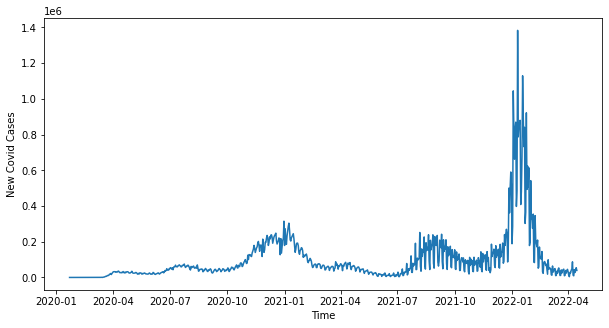

In [135]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(USdf.index, USdf[['new_cases']], linestyle=None)
ax.set_xlabel('Time')
ax.set_ylabel('New Covid Cases')
plt.show()

In [136]:
USdf['new_cases'].sort_values(ascending=False)

date
2022-01-10    1383795.0
2022-01-18    1129339.0
2022-01-03    1044839.0
2022-01-24     921979.0
2022-01-19     907981.0
                ...    
2020-02-08          0.0
2020-02-07          0.0
2020-02-05          0.0
2020-02-04          0.0
2020-01-22          0.0
Name: new_cases, Length: 815, dtype: float64

The shape of the graph below on new deaths looks very similar in shape to the one above on new cases. This is what is expected as now we know there is a higher chance that the deaths are related to Covid. Covid cases are expected to be a brilliant predictor for covid deaths which makes perfect sense.

One might wonder though about the covid testing and how it relates to the new cases. Could it be that the cause of the spike in cases could be due to a spike in testing? 

What usually prompts a covid test is when an individual would have covid 19 symptoms or they have been tracked down through contact tracing. Another reason for testing is when an individual wishes to travel across the border.

For now, we wont assume any relationship of causation between covid new cases and testing.

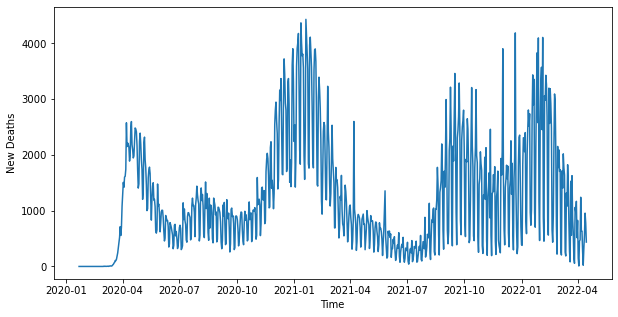

In [137]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(USdf.index, USdf[['new_deaths']])
ax.set_xlabel('Time')
ax.set_ylabel('New Deaths')
plt.show()

In [138]:
USdf['new_deaths'].sort_values(ascending=False)

date
2021-01-20    4431.0
2021-01-12    4368.0
2021-12-22    4188.0
2021-01-08    4178.0
2021-01-21    4118.0
               ...  
2020-02-26       0.0
2020-02-10       0.0
2020-02-09       0.0
2020-02-08       0.0
2020-01-22       0.0
Name: new_deaths, Length: 815, dtype: float64

As expected, hospital patients also show a similar pattern as well.

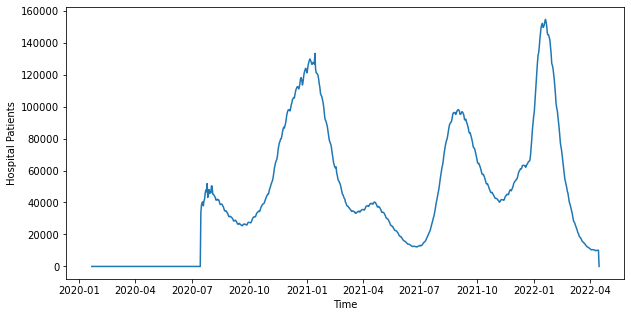

In [139]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(USdf.index, USdf[['hosp_patients']])
ax.set_xlabel('Time')
ax.set_ylabel('Hospital Patients')
plt.show()

The figure below clearly shows that most deaths happen around January and December for the years 2020 and 2021

<AxesSubplot:xlabel='date', ylabel='new_cases'>

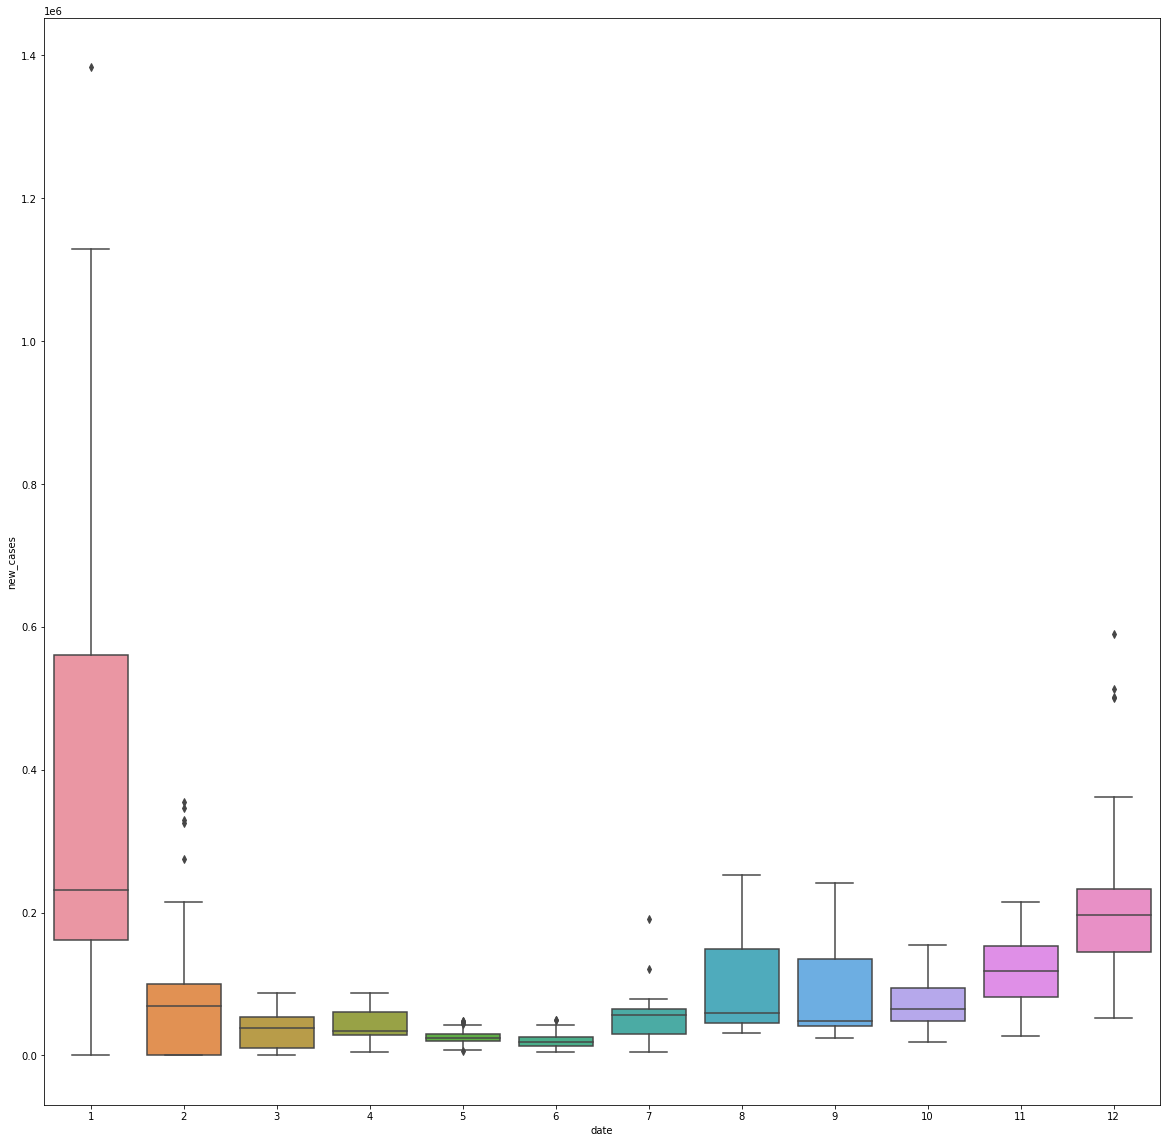

In [140]:
plt.figure(figsize=(20,20))
sns.boxplot(y=USdf['new_cases'], x=USdf.index.month)

The figure below suggests that people may be falling sick on Mondays.. Though its a very small margin and may not be significant at all.

<AxesSubplot:xlabel='date', ylabel='new_cases'>

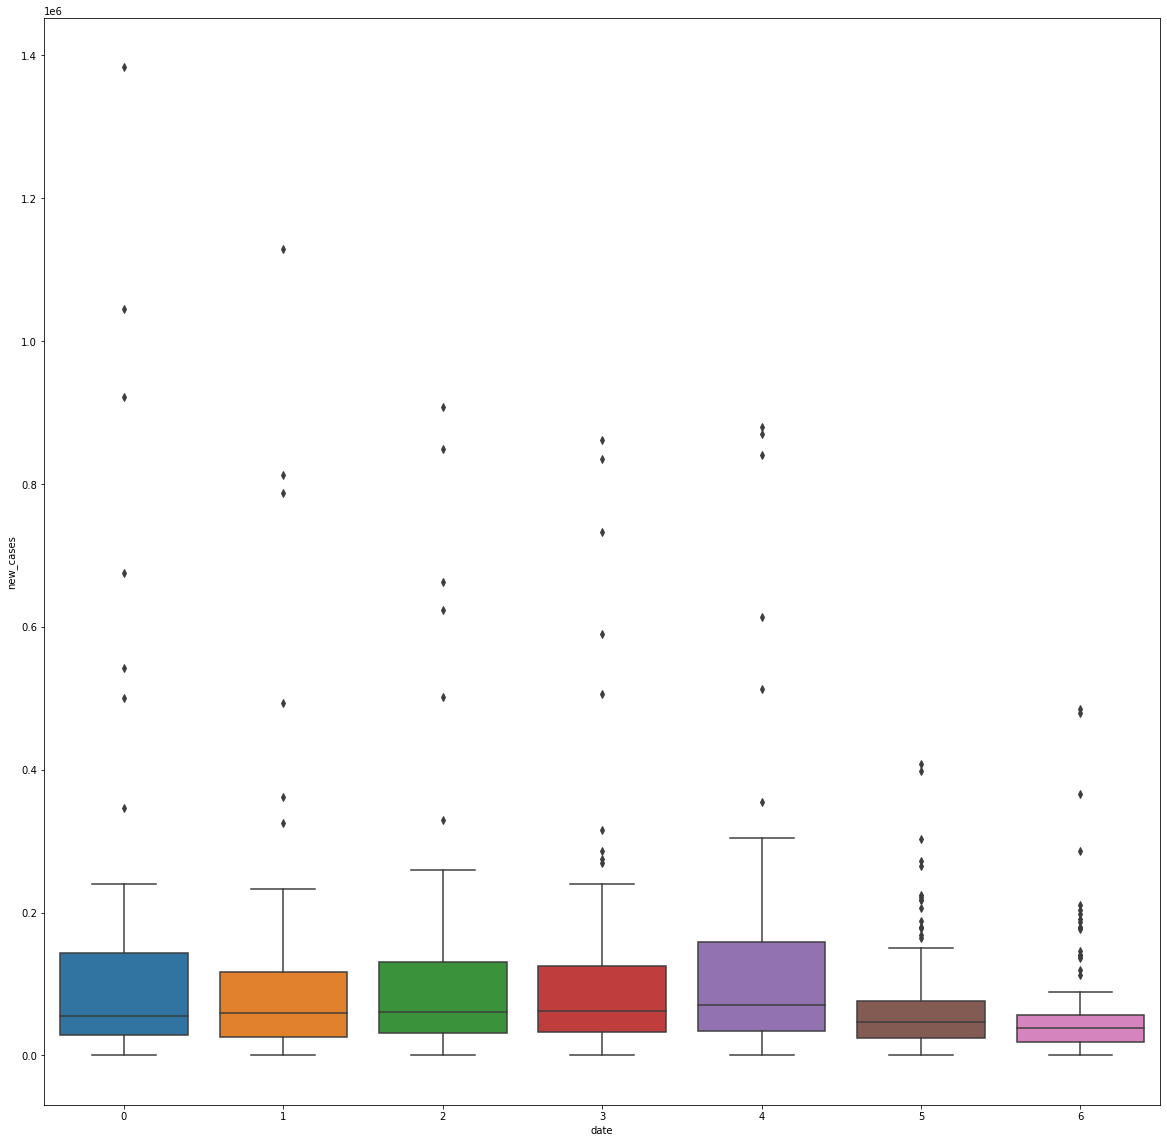

In [141]:
plt.figure(figsize=(20,20))
sns.boxplot(y=USdf['new_cases'], x=USdf.index.weekday)

Vaccinations started around January 2021, which also happens to be the peak time for new cases and deaths. It can be seen below that vaccinations were done more frequently at the start in January 2021, than later during the year. After vaccinations were done, the death rate and new cases went down quickly. Possibly because of the vaccinations. But they would then rise again around October. Despite people having all been vaccinated. Omicron would only break out in November 2021 and at this point, it was only in South Africa.

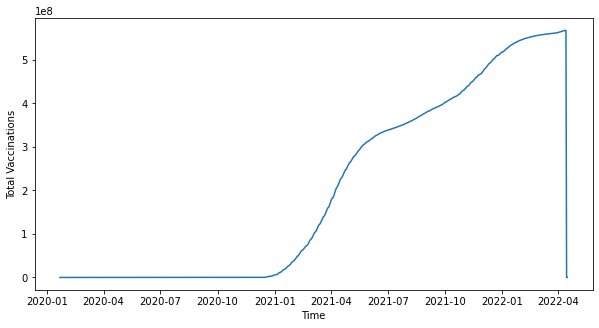

In [142]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(USdf.index, USdf[['total_vaccinations']])
ax.set_xlabel('Time')
ax.set_ylabel('Total Vaccinations')
plt.show()

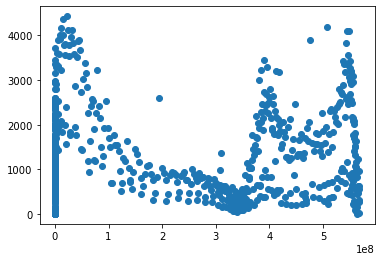

In [143]:
plt.scatter(USdf['total_vaccinations'], USdf['new_deaths'])

hmm.. There doesn't seem much of a correlation between vaccinations and deaths. Infact, it is slightly positive, Lets see between vaccinations and new cases.

In [144]:
USdf['total_vaccinations'].corr(USdf['new_deaths'])

0.05168057416994356

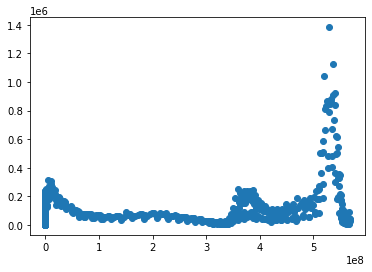

In [145]:
plt.scatter(USdf['total_vaccinations'], USdf['new_cases'])

In [146]:
USdf['total_vaccinations'].corr(USdf['new_cases'])

0.3097282184847621

Again, for the above plot, it seems total vaccinations and new cases may be positively correlated. Could be that after vaccinations, people are prepared to take risks. At this point, its not important.

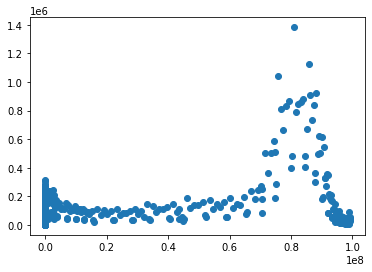

In [147]:
plt.scatter(USdf['total_boosters'], USdf['new_cases'])

In [148]:
USdf['total_boosters'].corr(USdf['new_cases'])

0.3814172509979179

The data says the more the boosters, the higher the covid cases. Though its only at a pearson correlation coefficient value of 0.38 which denotes a low correlation

Restrictions seem to have reached an all time low around June 2021

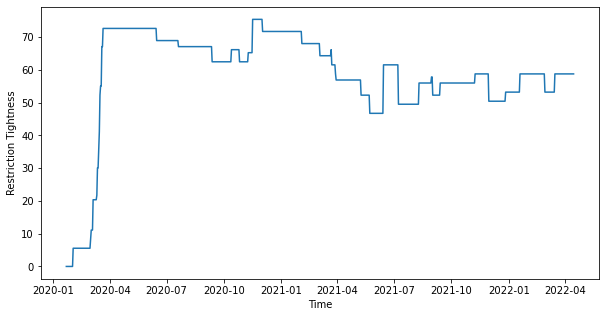

In [149]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(USdf.index, USdf[['stringency_index']])
ax.set_xlabel('Time')
ax.set_ylabel('Restriction Tightness')
plt.show()

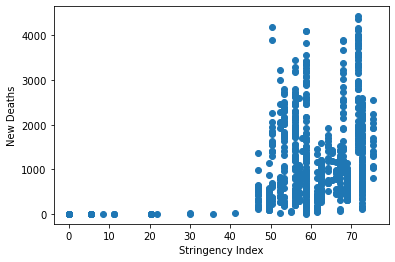

In [150]:
plt.scatter(USdf['stringency_index'], USdf['new_deaths'])
plt.xlabel('Stringency Index')
plt.ylabel('New Deaths')
plt.show()

In [151]:
USdf['stringency_index'].corr(USdf['new_deaths'])

0.4028001655292983

According the the plot above, the higher the stringency index, the more the deaths. This again, could be a causal relationship. When government sees deaths rise, they decide to tighten up restrictions. In other words, the more the deaths, the higher the stringency index.

In [152]:
USdf['stringency_index'].sort_values(ascending=False)

date
2020-11-20    75.46
2020-11-28    75.46
2020-11-16    75.46
2020-11-17    75.46
2020-11-18    75.46
              ...  
2020-01-27     0.00
2020-01-26     0.00
2020-01-25     0.00
2020-01-24     0.00
2020-01-22     0.00
Name: stringency_index, Length: 815, dtype: float64

According to the data, there must have been a new case somewhere in 2019, but the data begins in 2020. It makes sense to get rid of the total cases since it is just an accumulation of the new cases with the exception of that one.

In [153]:
USdf.drop('total_cases', axis=1, inplace=True)

In [154]:
USdf.drop(['total_cases_per_million'], axis=1, inplace=True)

In [155]:
USdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 815 entries, 2020-01-22 to 2022-04-15
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   new_cases                            815 non-null    float64
 1   new_deaths                           815 non-null    float64
 2   new_cases_per_million                815 non-null    float64
 3   reproduction_rate                    815 non-null    float64
 4   icu_patients                         815 non-null    float64
 5   icu_patients_per_million             815 non-null    float64
 6   hosp_patients                        815 non-null    float64
 7   hosp_patients_per_million            815 non-null    float64
 8   weekly_hosp_admissions               815 non-null    float64
 9   weekly_hosp_admissions_per_million   815 non-null    float64
 10  total_tests                          815 non-null    float64
 11  new_tests    

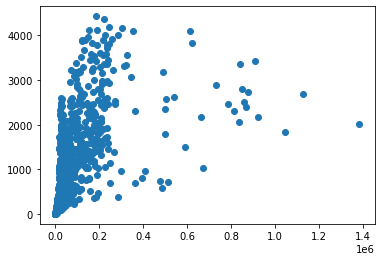

In [156]:
plt.scatter(USdf['new_cases'], USdf['new_deaths'])

In [157]:
USdf['new_cases'].corr(USdf['new_deaths'])

0.4927035434101323

There is a correlation between new cases and new deaths. A pearson correlation value of .49 shows a fairly sure sign of correlation.

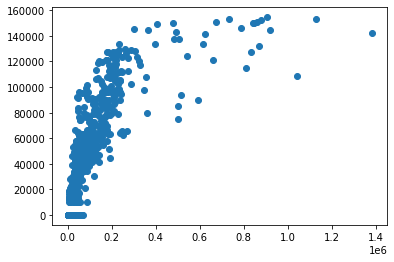

In [158]:
plt.scatter(USdf['new_cases'], USdf['hosp_patients'])

In [159]:
USdf['new_cases'].corr(USdf['hosp_patients'])

0.7372013530494476

As expected, there is a high correlation between new cases and hospital patients admitted.

In [160]:
USdf['hosp_patients'].sort_values(ascending=False)

date
2022-01-19    154540.0
2022-01-18    153236.0
2022-01-20    152940.0
2022-01-14    152057.0
2022-01-13    151017.0
                ...   
2020-05-16         0.0
2020-05-15         0.0
2020-05-14         0.0
2020-05-13         0.0
2022-04-15         0.0
Name: hosp_patients, Length: 815, dtype: float64

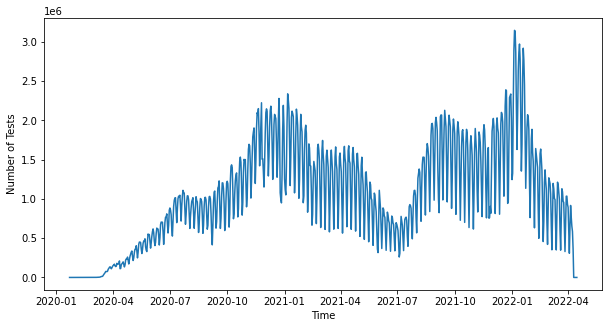

In [161]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(USdf.index, USdf[['new_tests']])
ax.set_xlabel('Time')
ax.set_ylabel('Number of Tests')
plt.show()

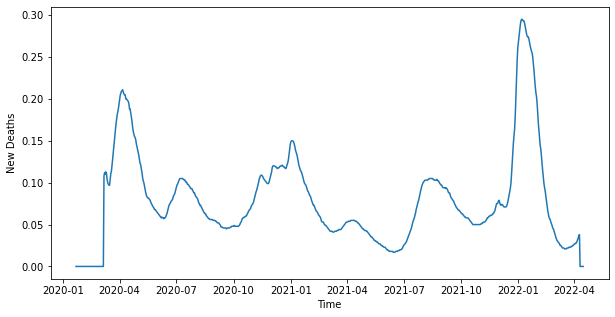

In [162]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(USdf.index, USdf[['positive_rate']])
ax.set_xlabel('Time')
ax.set_ylabel('New Deaths')
plt.show()

***Principal Component Analysis***

We now have a fair understanding of the dataset. Some of the features show exactly the same trends over a time series such as new_cases, new_deaths, hosp_patients, new_tests, and positive_rate. There are also features with low positive correlations even where it is unexpected such as vaccinations and new cases/new deaths. The dataset still has a lot of features making it hard to really understand the correlations.

In order to help deal with the dimensionality of the data, we shall be performing a principal components analysis.

*Scaling the Data*

The first step is to scale the data. We shall use a new variable to hold the scaled data.

In [163]:
USdf_new = USdf.drop('new_deaths', axis=1)
USdfSc = scale(USdf_new)

C:\Users\ituser\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [164]:
USdfSc = pd.DataFrame(USdfSc, columns=USdf_new.columns)

In [165]:
USdfSc.mean()

new_cases                             -1.023040e-16
new_cases_per_million                  2.983980e-16
reproduction_rate                     -1.525705e-17
icu_patients                          -6.418860e-16
icu_patients_per_million               2.487444e-16
hosp_patients                          7.162641e-16
hosp_patients_per_million             -1.173431e-15
weekly_hosp_admissions                 1.221926e-15
weekly_hosp_admissions_per_million    -5.143806e-16
total_tests                           -2.615495e-16
new_tests                             -4.468137e-17
total_tests_per_thousand               7.257998e-16
new_tests_per_thousand                -1.738214e-16
positive_rate                         -1.612888e-16
tests_per_case                         6.102821e-17
total_vaccinations                    -2.423147e-15
people_vaccinated                      1.546956e-15
people_fully_vaccinated               -1.014049e-15
total_boosters                         9.099742e-16
new_vaccinat

In [166]:
USdfSc.std()

new_cases                              1.000614
new_cases_per_million                  1.000614
reproduction_rate                      1.000614
icu_patients                           1.000614
icu_patients_per_million               1.000614
hosp_patients                          1.000614
hosp_patients_per_million              1.000614
weekly_hosp_admissions                 1.000614
weekly_hosp_admissions_per_million     1.000614
total_tests                            1.000614
new_tests                              1.000614
total_tests_per_thousand               1.000614
new_tests_per_thousand                 1.000614
positive_rate                          1.000614
tests_per_case                         1.000614
total_vaccinations                     1.000614
people_vaccinated                      1.000614
people_fully_vaccinated                1.000614
total_boosters                         1.000614
new_vaccinations                       1.000614
total_vaccinations_per_hundred         1

In [167]:
USdfSc.std(ddof=0)

new_cases                              1.0
new_cases_per_million                  1.0
reproduction_rate                      1.0
icu_patients                           1.0
icu_patients_per_million               1.0
hosp_patients                          1.0
hosp_patients_per_million              1.0
weekly_hosp_admissions                 1.0
weekly_hosp_admissions_per_million     1.0
total_tests                            1.0
new_tests                              1.0
total_tests_per_thousand               1.0
new_tests_per_thousand                 1.0
positive_rate                          1.0
tests_per_case                         1.0
total_vaccinations                     1.0
people_vaccinated                      1.0
people_fully_vaccinated                1.0
total_boosters                         1.0
new_vaccinations                       1.0
total_vaccinations_per_hundred         1.0
people_vaccinated_per_hundred          1.0
people_fully_vaccinated_per_hundred    1.0
total_boost

array([[<AxesSubplot:title={'center':'new_cases'}>,
        <AxesSubplot:title={'center':'new_cases_per_million'}>,
        <AxesSubplot:title={'center':'reproduction_rate'}>,
        <AxesSubplot:title={'center':'icu_patients'}>,
        <AxesSubplot:title={'center':'icu_patients_per_million'}>],
       [<AxesSubplot:title={'center':'hosp_patients'}>,
        <AxesSubplot:title={'center':'hosp_patients_per_million'}>,
        <AxesSubplot:title={'center':'weekly_hosp_admissions'}>,
        <AxesSubplot:title={'center':'weekly_hosp_admissions_per_million'}>,
        <AxesSubplot:title={'center':'total_tests'}>],
       [<AxesSubplot:title={'center':'new_tests'}>,
        <AxesSubplot:title={'center':'total_tests_per_thousand'}>,
        <AxesSubplot:title={'center':'new_tests_per_thousand'}>,
        <AxesSubplot:title={'center':'positive_rate'}>,
        <AxesSubplot:title={'center':'tests_per_case'}>],
       [<AxesSubplot:title={'center':'total_vaccinations'}>,
        <AxesSubplot:

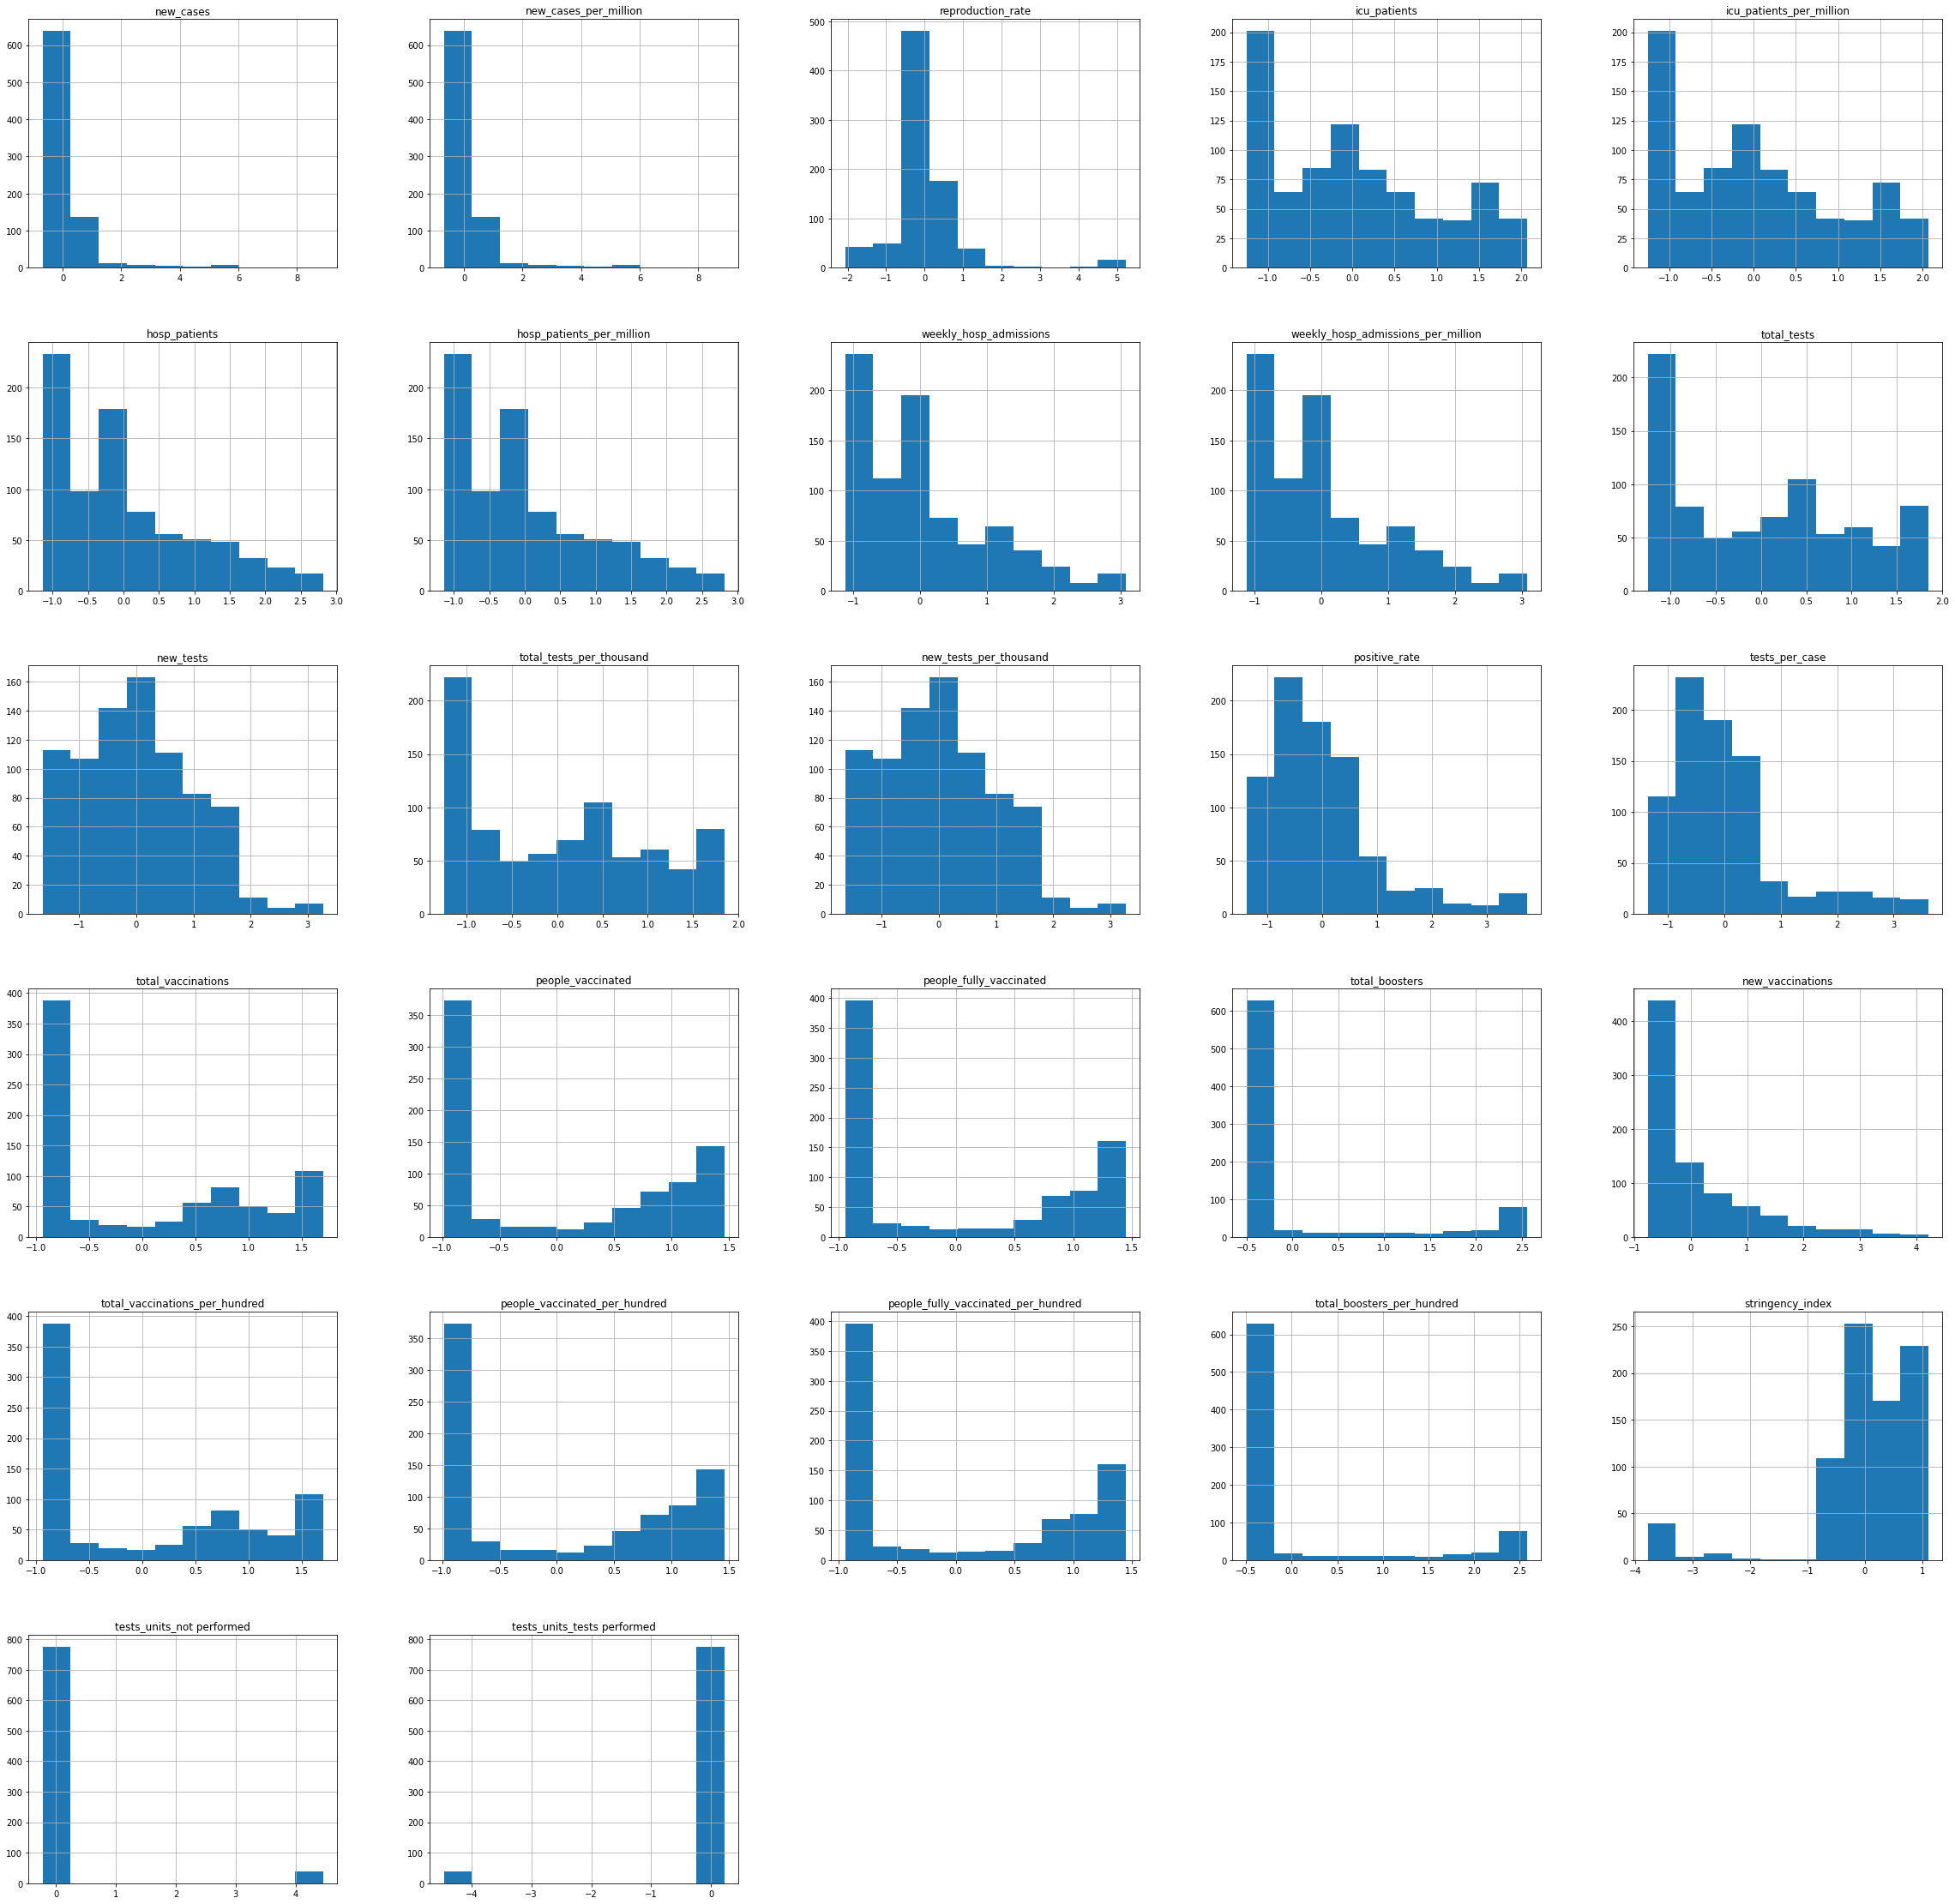

In [168]:
pd.DataFrame(USdfSc).hist(figsize=(40,40))

In [169]:
pca = PCA()

In [170]:
USdfPCA = pca.fit(USdfSc)

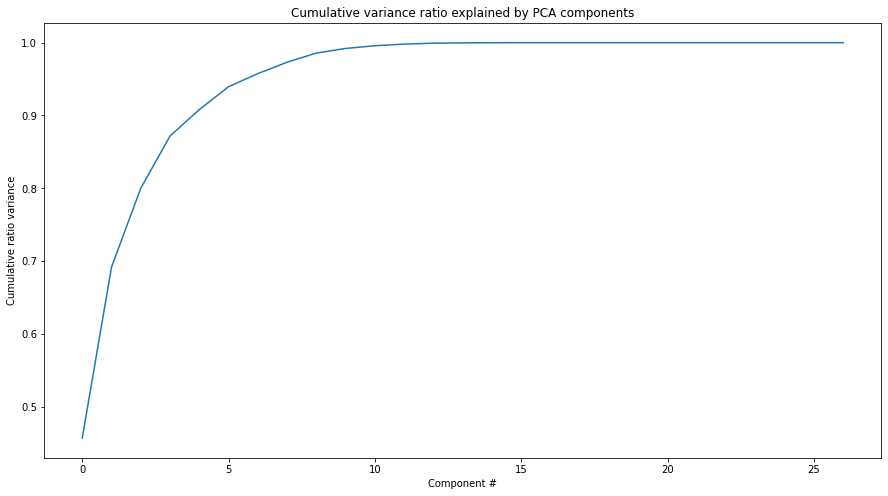

In [171]:
plt.subplots(figsize=(15, 8))
plt.plot(USdfPCA.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components');

The first 2 principal components explain 68% of variance. About 5 of the principal components explain 90% of the variance. 10 explain about 97% of the variance

In [172]:
dfx = USdfPCA.transform(USdfSc)

In [173]:
dfx.shape

(815, 27)

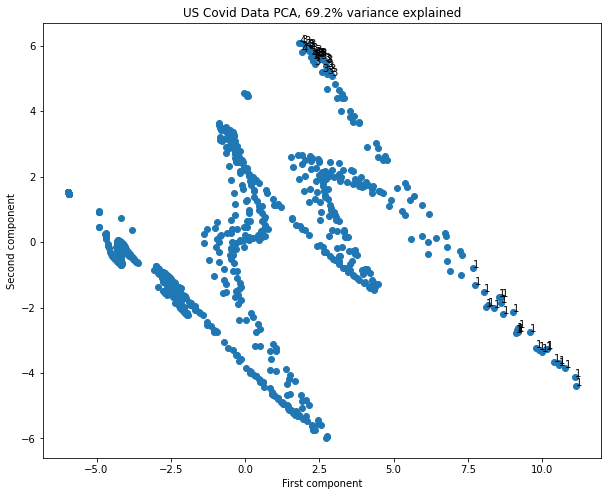

In [174]:
x = dfx[:, 0]
y = dfx[:, 1]
df_index = USdf.index
component_y = 100 * USdfPCA.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'US Covid Data PCA, {component_y:.1f}% variance explained')
for s, x, y in zip(df_index.month, x, y):
    if x > 7.5 or y > 5:
        plt.annotate(s, (x, y))


In [175]:
pd.DataFrame(USdfPCA.components_, columns=USdf_new.columns)

,new_cases,new_cases_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,...,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,stringency_index,tests_units_not performed,tests_units_tests performed
0,1.990159e-01,1.990159e-01,-5.701457e-03,2.088043e-01,2.088041e-01,2.236584e-01,2.236584e-01,2.260847e-01,2.260847e-01,2.487691e-01,...,2.208630e-01,1.775816e-01,1.048271e-01,2.259501e-01,2.242731e-01,2.208636e-01,1.814201e-01,3.372469e-02,-1.080285e-01,1.080285e-01
1,-1.686406e-01,-1.686406e-01,-5.035068e-02,-2.274003e-01,-2.274006e-01,-2.252225e-01,-2.252225e-01,-2.197155e-01,-2.197154e-01,1.755453e-01,...,2.371635e-01,1.749889e-01,2.598966e-02,2.370132e-01,2.348404e-01,2.371627e-01,1.757147e-01,-1.600038e-01,5.239081e-02,-5.239081e-02
2,1.176936e-01,1.176935e-01,-3.132005e-01,4.517241e-02,4.517224e-02,7.819521e-02,7.819522e-02,8.172299e-02,8.172301e-02,-1.286298e-02,...,3.317202e-03,6.692323e-02,-6.426525e-02,1.070228e-02,-1.150484e-03,3.318022e-03,6.810832e-02,-4.573369e-01,5.232327e-01,-5.232327e-01
3,2.361818e-01,2.361819e-01,3.120884e-01,-1.676335e-01,-1.676343e-01,-5.685233e-02,-5.685239e-02,-3.641984e-02,-3.641980e-02,-6.541207e-02,...,-2.083396e-03,3.259305e-01,-3.956361e-01,3.393960e-02,-2.579405e-02,-2.082125e-03,3.198890e-01,5.187167e-02,-4.370013e-02,4.370013e-02
4,2.166514e-01,2.166514e-01,4.490572e-01,-1.511103e-01,-1.511102e-01,-1.268150e-01,-1.268149e-01,-1.000369e-01,-1.000369e-01,-4.276639e-02,...,5.058565e-02,-2.174186e-01,5.707643e-01,2.416050e-02,7.321477e-02,5.058637e-02,-2.148813e-01,-2.635083e-01,5.709299e-02,-5.709299e-02
5,2.492792e-01,2.492792e-01,-4.395532e-01,-2.193037e-01,-2.193042e-01,-1.119031e-01,-1.119031e-01,-9.541987e-02,-9.541985e-02,3.933358e-04,...,-1.576769e-01,2.829217e-01,2.802966e-01,-8.031199e-02,-1.230380e-01,-1.576749e-01,2.817361e-01,2.199268e-01,1.257278e-02,-1.257278e-02
6,3.757540e-01,3.757540e-01,-8.387006e-02,-5.234006e-02,-5.234003e-02,-1.925244e-02,-1.925264e-02,2.468827e-02,2.468815e-02,-1.866298e-02,...,7.746867e-02,-3.128243e-01,-3.529499e-01,4.132581e-03,3.671455e-02,7.747884e-02,-2.936813e-01,-8.728362e-02,1.581100e-02,-1.581100e-02
7,-1.170223e-02,-1.170223e-02,5.337210e-01,2.676214e-02,2.676188e-02,2.907708e-03,2.907645e-03,3.780393e-03,3.780301e-03,2.513979e-02,...,-9.305147e-02,2.037235e-01,-2.772090e-01,-6.587765e-02,-1.170892e-01,-9.305422e-02,1.937887e-01,-2.693879e-01,7.316546e-02,-7.316546e-02
8,-2.887255e-02,-2.887252e-02,-1.922658e-01,-1.495950e-02,-1.495968e-02,-1.590842e-01,-1.590842e-01,-2.015704e-01,-2.015705e-01,-9.368226e-02,...,1.672544e-01,-1.788872e-01,-4.376491e-01,8.133667e-02,8.386505e-02,1.672434e-01,-1.631031e-01,9.636179e-02,-1.370000e-02,1.370000e-02
9,2.589039e-01,2.589039e-01,-1.414223e-01,4.975004e-02,4.975029e-02,-4.215109e-03,-4.215061e-03,-1.993602e-02,-1.993592e-02,-1.907085e-01,...,2.483455e-02,8.321246e-02,2.817659e-02,2.553412e-02,3.137185e-02,2.483405e-02,-3.465556e-03,-2.395249e-01,-3.271852e-01,3.271852e-01


In [176]:
pd.DataFrame(USdfPCA.components_, columns=USdf_new.columns).idxmax(1)

0               total_tests_per_thousand
1                people_fully_vaccinated
2              tests_units_not performed
3                          positive_rate
4                       new_vaccinations
5                         total_boosters
6                         tests_per_case
7                      reproduction_rate
8                              new_tests
9            tests_units_tests performed
10                         positive_rate
11                        tests_per_case
12                          icu_patients
13                        total_boosters
14                         hosp_patients
15                     people_vaccinated
16                     people_vaccinated
17                new_tests_per_thousand
18               people_fully_vaccinated
19         people_vaccinated_per_hundred
20                    total_vaccinations
21              icu_patients_per_million
22    weekly_hosp_admissions_per_million
23                         hosp_patients
24              

Below are tables showing the most influential features to the first 5 principal components which together account for over 90% of the data's variance. The principal components are in order of their influence on the variance of the data with PC0 being the most influential. 

It is very clear that stringency index has a very high influence PC0. Which does make some sense since the more movement is restricted, the less likely the virus is able to spread. another interesting feature is hospital patients per million. It could be that the more the hospital patients, the more hospitals fill up causing a large increase in number of patients. This feature also has a lot of weight for the 2nd principal component PC1. Meanwhile, PC3 and PC4 are influenced by vaccinations. Meaning vaccinations do have a degree of influence on the data as well.w

In [177]:
pd.DataFrame(np.abs(USdfPCA.components_[:,0]), index=USdf_new.columns, columns=['PC0']).sort_values(by='PC0', ascending=False)

,PC0
stringency_index,7.070893e-01
hosp_patients_per_million,3.757540e-01
total_tests,2.589039e-01
hosp_patients,2.492792e-01
icu_patients,2.361818e-01
icu_patients_per_million,2.166514e-01
new_cases,1.990159e-01
new_cases_per_million,1.686406e-01
new_tests,1.537182e-01
total_tests_per_thousand,1.271148e-01


In [178]:
pd.DataFrame(np.abs(USdfPCA.components_[:,1]), index=USdf_new.columns, columns=['PC1']).sort_values(by='PC1', ascending=False)

,PC1
stringency_index,7.070893e-01
hosp_patients_per_million,3.757540e-01
total_tests,2.589039e-01
hosp_patients,2.492792e-01
icu_patients,2.361819e-01
icu_patients_per_million,2.166514e-01
new_cases,1.990159e-01
new_cases_per_million,1.686406e-01
new_tests,1.537183e-01
total_tests_per_thousand,1.271147e-01


In [179]:
pd.DataFrame(np.abs(USdfPCA.components_[:,2]), index=USdf_new.columns, columns=['PC2']).sort_values(by='PC2', ascending=False)

,PC2
weekly_hosp_admissions,5.337210e-01
icu_patients_per_million,4.490572e-01
hosp_patients,4.395532e-01
reproduction_rate,3.132005e-01
icu_patients,3.120884e-01
new_tests,2.406774e-01
weekly_hosp_admissions_per_million,1.922658e-01
total_tests,1.414223e-01
hosp_patients_per_million,8.387006e-02
new_cases_per_million,5.035068e-02


In [180]:
pd.DataFrame(np.abs(USdfPCA.components_[:,3]), index=USdf_new.columns, columns=['PC3']).sort_values(by='PC3', ascending=False)

,PC3
people_vaccinated_per_hundred,7.070257e-01
new_tests_per_thousand,4.559996e-01
tests_per_case,2.846720e-01
new_cases_per_million,2.274003e-01
hosp_patients,2.193037e-01
new_cases,2.088043e-01
icu_patients,1.676335e-01
icu_patients_per_million,1.511103e-01
new_tests,8.465286e-02
hosp_patients_per_million,5.234006e-02


In [181]:
pd.DataFrame(np.abs(USdfPCA.components_[:,4]), index=USdf_new.columns, columns=['PC4']).sort_values(by='PC4', ascending=False)

,PC4
people_vaccinated_per_hundred,7.070309e-01
new_tests_per_thousand,4.559981e-01
tests_per_case,2.846605e-01
new_cases_per_million,2.274006e-01
hosp_patients,2.193042e-01
new_cases,2.088041e-01
icu_patients,1.676343e-01
icu_patients_per_million,1.511102e-01
new_tests,8.465348e-02
hosp_patients_per_million,5.234003e-02


PC0 maxed out on January 2022, and PC1 maxed out in March 2022.

In [182]:
pca_df = pd.DataFrame({'PC0': np.abs(dfx[:,0])}, index=USdf_new.index).sort_values('PC0', ascending=False)
pca_df.head(50)

,PC0
date,
2022-01-10,11.130578
2022-01-18,11.094222
2022-01-19,10.758170
2022-01-13,10.569012
2022-01-14,10.564376
2022-01-12,10.409241
2022-01-21,10.173001
2022-01-20,10.130165
2022-01-11,9.984935


In [183]:
pca_df = pd.DataFrame({'PC1': np.abs(dfx[:,1])}, index=USdf_new.index).sort_values('PC1', ascending=False)
pca_df.head(50)

,PC1
date,
2022-03-27,6.087154
2022-04-03,6.069511
2022-03-20,6.047089
2021-01-06,5.985906
2022-03-26,5.975158
2021-01-07,5.966490
2022-03-19,5.950131
2022-04-02,5.935567
2022-03-13,5.926802


PCA maxed out on the 18th of January 2021.

In [188]:
graph_df =  pd.DataFrame({'PC0': dfx[:,0], 'PC1': dfx[:,1]}, index=USdf_new.index).sort_values('PC0', ascending=False)

<AxesSubplot:xlabel='date'>

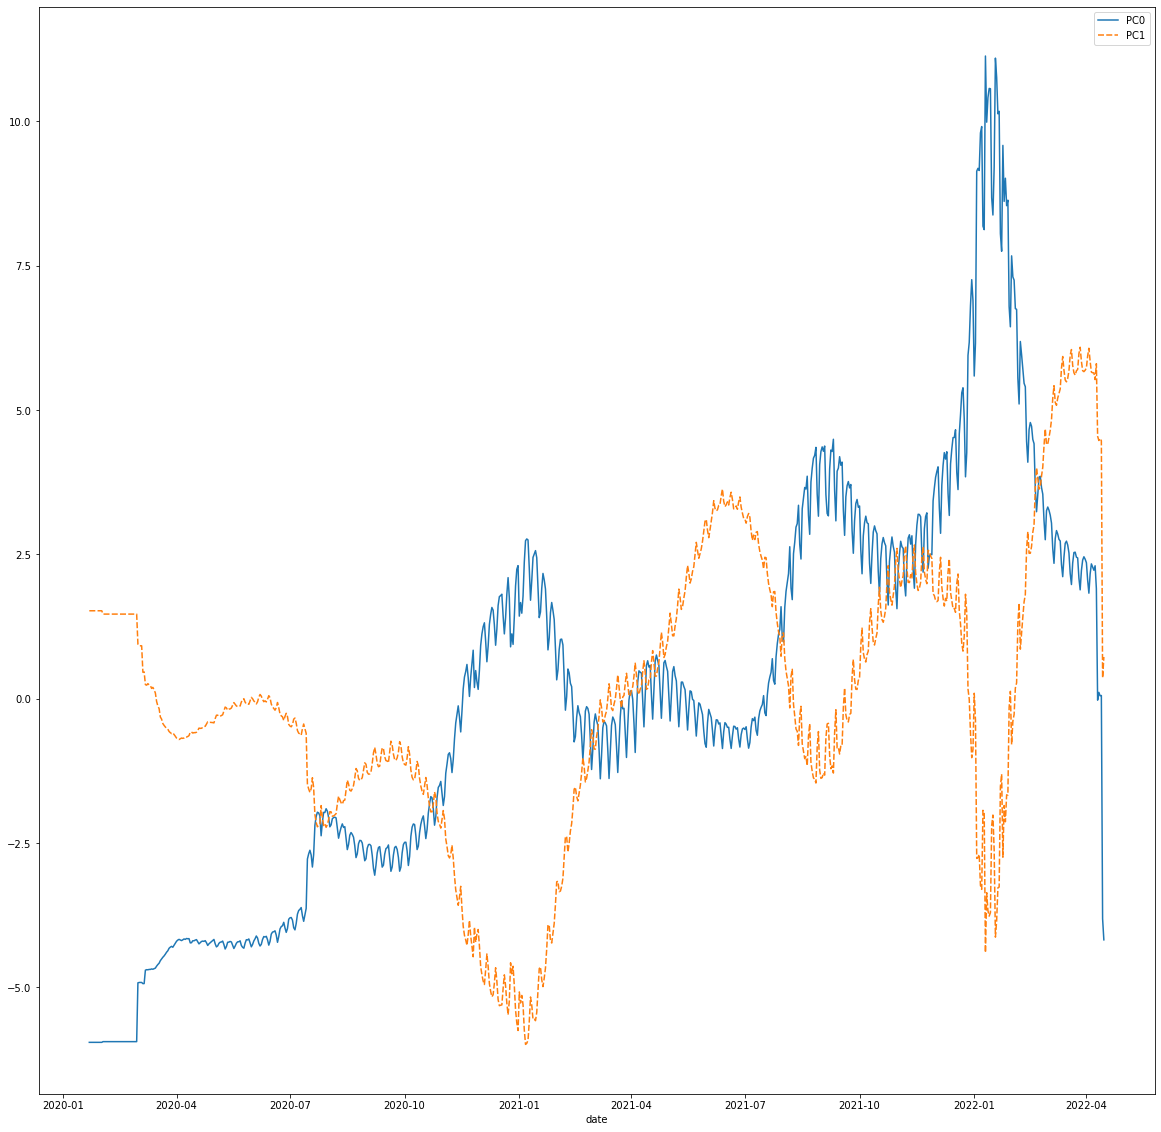

In [189]:
plt.figure(figsize=(20,20))
sns.lineplot(data=graph_df)

In the above chart, the two principal components seem to be an inverse of each other.

In [190]:
USdfPCA.components_[0,:]

array([ 0.19901593,  0.19901592, -0.00570146,  0.20880429,  0.20880405,
        0.22365842,  0.22365843,  0.22608466,  0.2260847 ,  0.24876909,
        0.21627745,  0.24876909,  0.21627657,  0.11582335,  0.01901335,
        0.22595015,  0.22427245,  0.220863  ,  0.17758162,  0.10482707,
        0.22595006,  0.22427312,  0.22086362,  0.18142007,  0.03372469,
       -0.10802852,  0.10802852])

Among the most interesting features that seem to explain the variability of the data are total_tests_per_thousand, people_fully_vaccinated, tests_units_not performed, positive_rate, reproduction_rate, new_vaccinations. 

In [191]:
USdf.to_csv('USCovidData.csv')